In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

preliminary data analysis of polarity mxene dataset. Start by loading data into dataframe

In [ ]:
df = pd.read_csv("../data/008_dataset_mx_solvent_using_polarity_index.csv")
print(df.head())
print(df.info())
print(df.describe())

labdf = df[df["label"] != 0]

   Unnamed: 0     mx method       solvent  label                     inchikey  \
0           0  Ti3C2     HF         water      1  XLYOFNOQVPJJNP-UHFFFAOYSA-N   
1           1  Ti3C2     HF       ethanol      1  LFQSCWFLJHTTHZ-UHFFFAOYSA-N   
2           2  Ti3C2     HF      methanol     -1  OKKJLVBELUTLKV-UHFFFAOYSA-N   
3           3  Ti3C2     HF       acetone     -1  CSCPPACGZOOCGX-UHFFFAOYSA-N   
4           4  Ti3C2     HF  acetonitrile     -1  WEVYAHXRMPXWCK-UHFFFAOYSA-N   

     p    xe    xd    xn  ...  h_bond_donor_count  h_bond_acceptor_count  \
0  9.0  0.40  0.34  0.26  ...                   1                      1   
1  5.2  0.51  0.21  0.28  ...                   1                      1   
2  6.6  0.51  0.19  0.30  ...                   1                      1   
3  5.4  0.36  0.24  0.40  ...                   0                      1   
4  6.2  0.33  0.26  0.41  ...                   0                      1   

   rotatable_bond_count  heavy_atom_count  isotope_atom_

In [6]:
dfnozero = df.loc[:, (df != 0).any(axis=0)]
dfnozero = dfnozero.drop('covalent_unit_count', axis=1)
dfnozero = dfnozero.drop('mmhg', axis=1)

labdfnozero = labdf.loc[:, (labdf != 0).any(axis=0)]
labdfnozero = labdfnozero.drop('covalent_unit_count', axis=1)
labdfnozero = labdfnozero.drop('mmhg', axis=1)

visualize labelled vs unlabelled data, plot distribution of solvents, plot distribution of MXenes

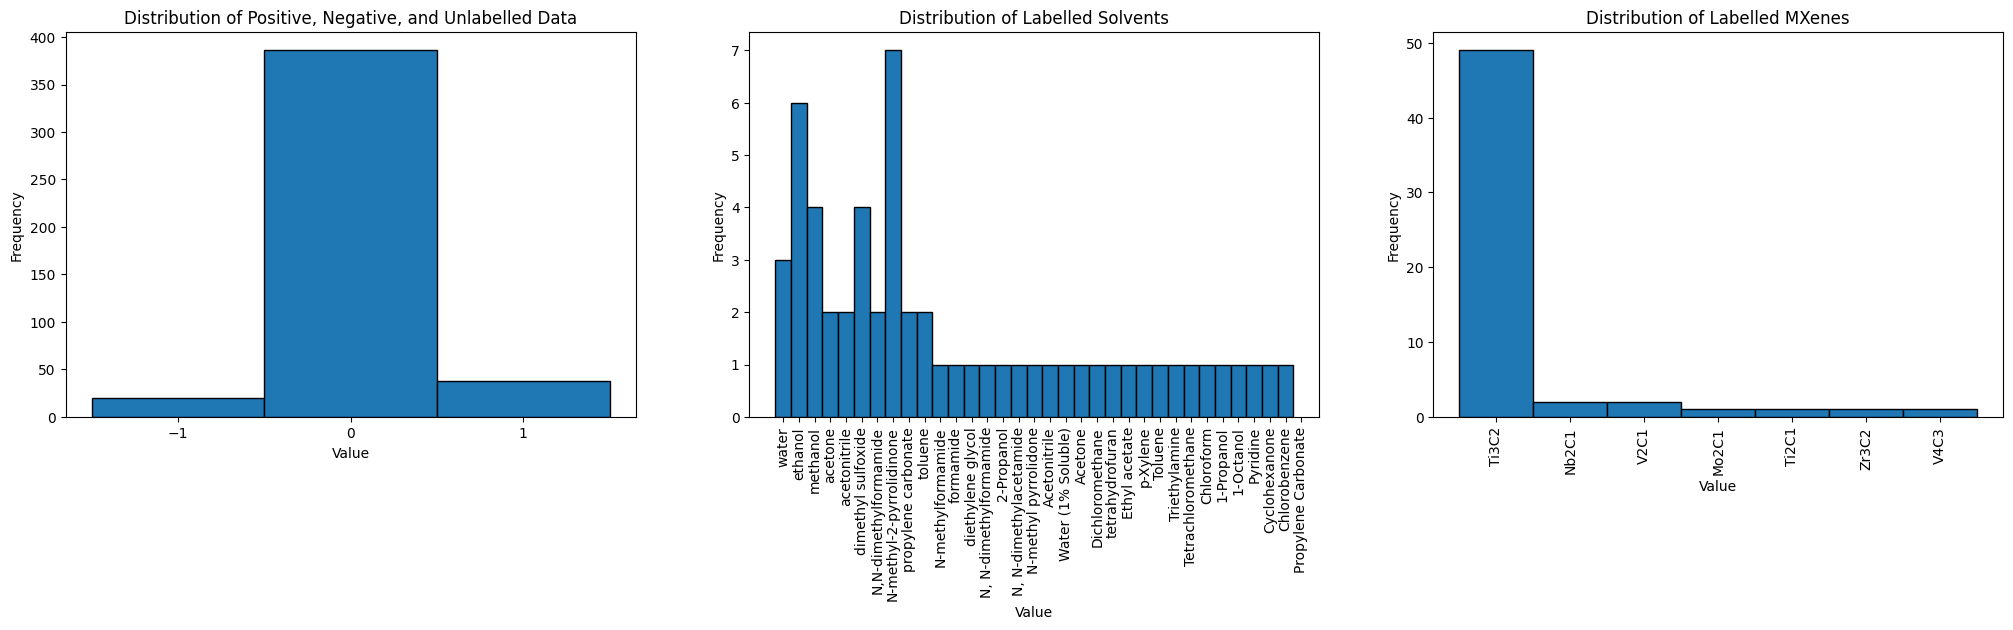

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(25,5))

axs[0].hist(df["label"],bins=[-1.5,-0.5,0.5,1.5], align="mid", edgecolor='black')
axs[0].set_xticks(np.unique(df["label"]))
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Positive, Negative, and Unlabelled Data')

axs[1].hist(labdf["solvent"], bins=np.arange(len(np.unique(df["solvent"])))-0.5, align="mid", edgecolor='black')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Labelled Solvents')
axs[1].tick_params(axis='x', labelrotation=90)

axs[2].hist(labdf["mx"], bins=np.arange(len(np.unique(df["mx"])))-0.5, align="mid", edgecolor='black')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Labelled MXenes')
axs[2].tick_params(axis='x', labelrotation=90)

plt.show()

simple correlation matrices for full dataset, then dataset with no varience columns excluded

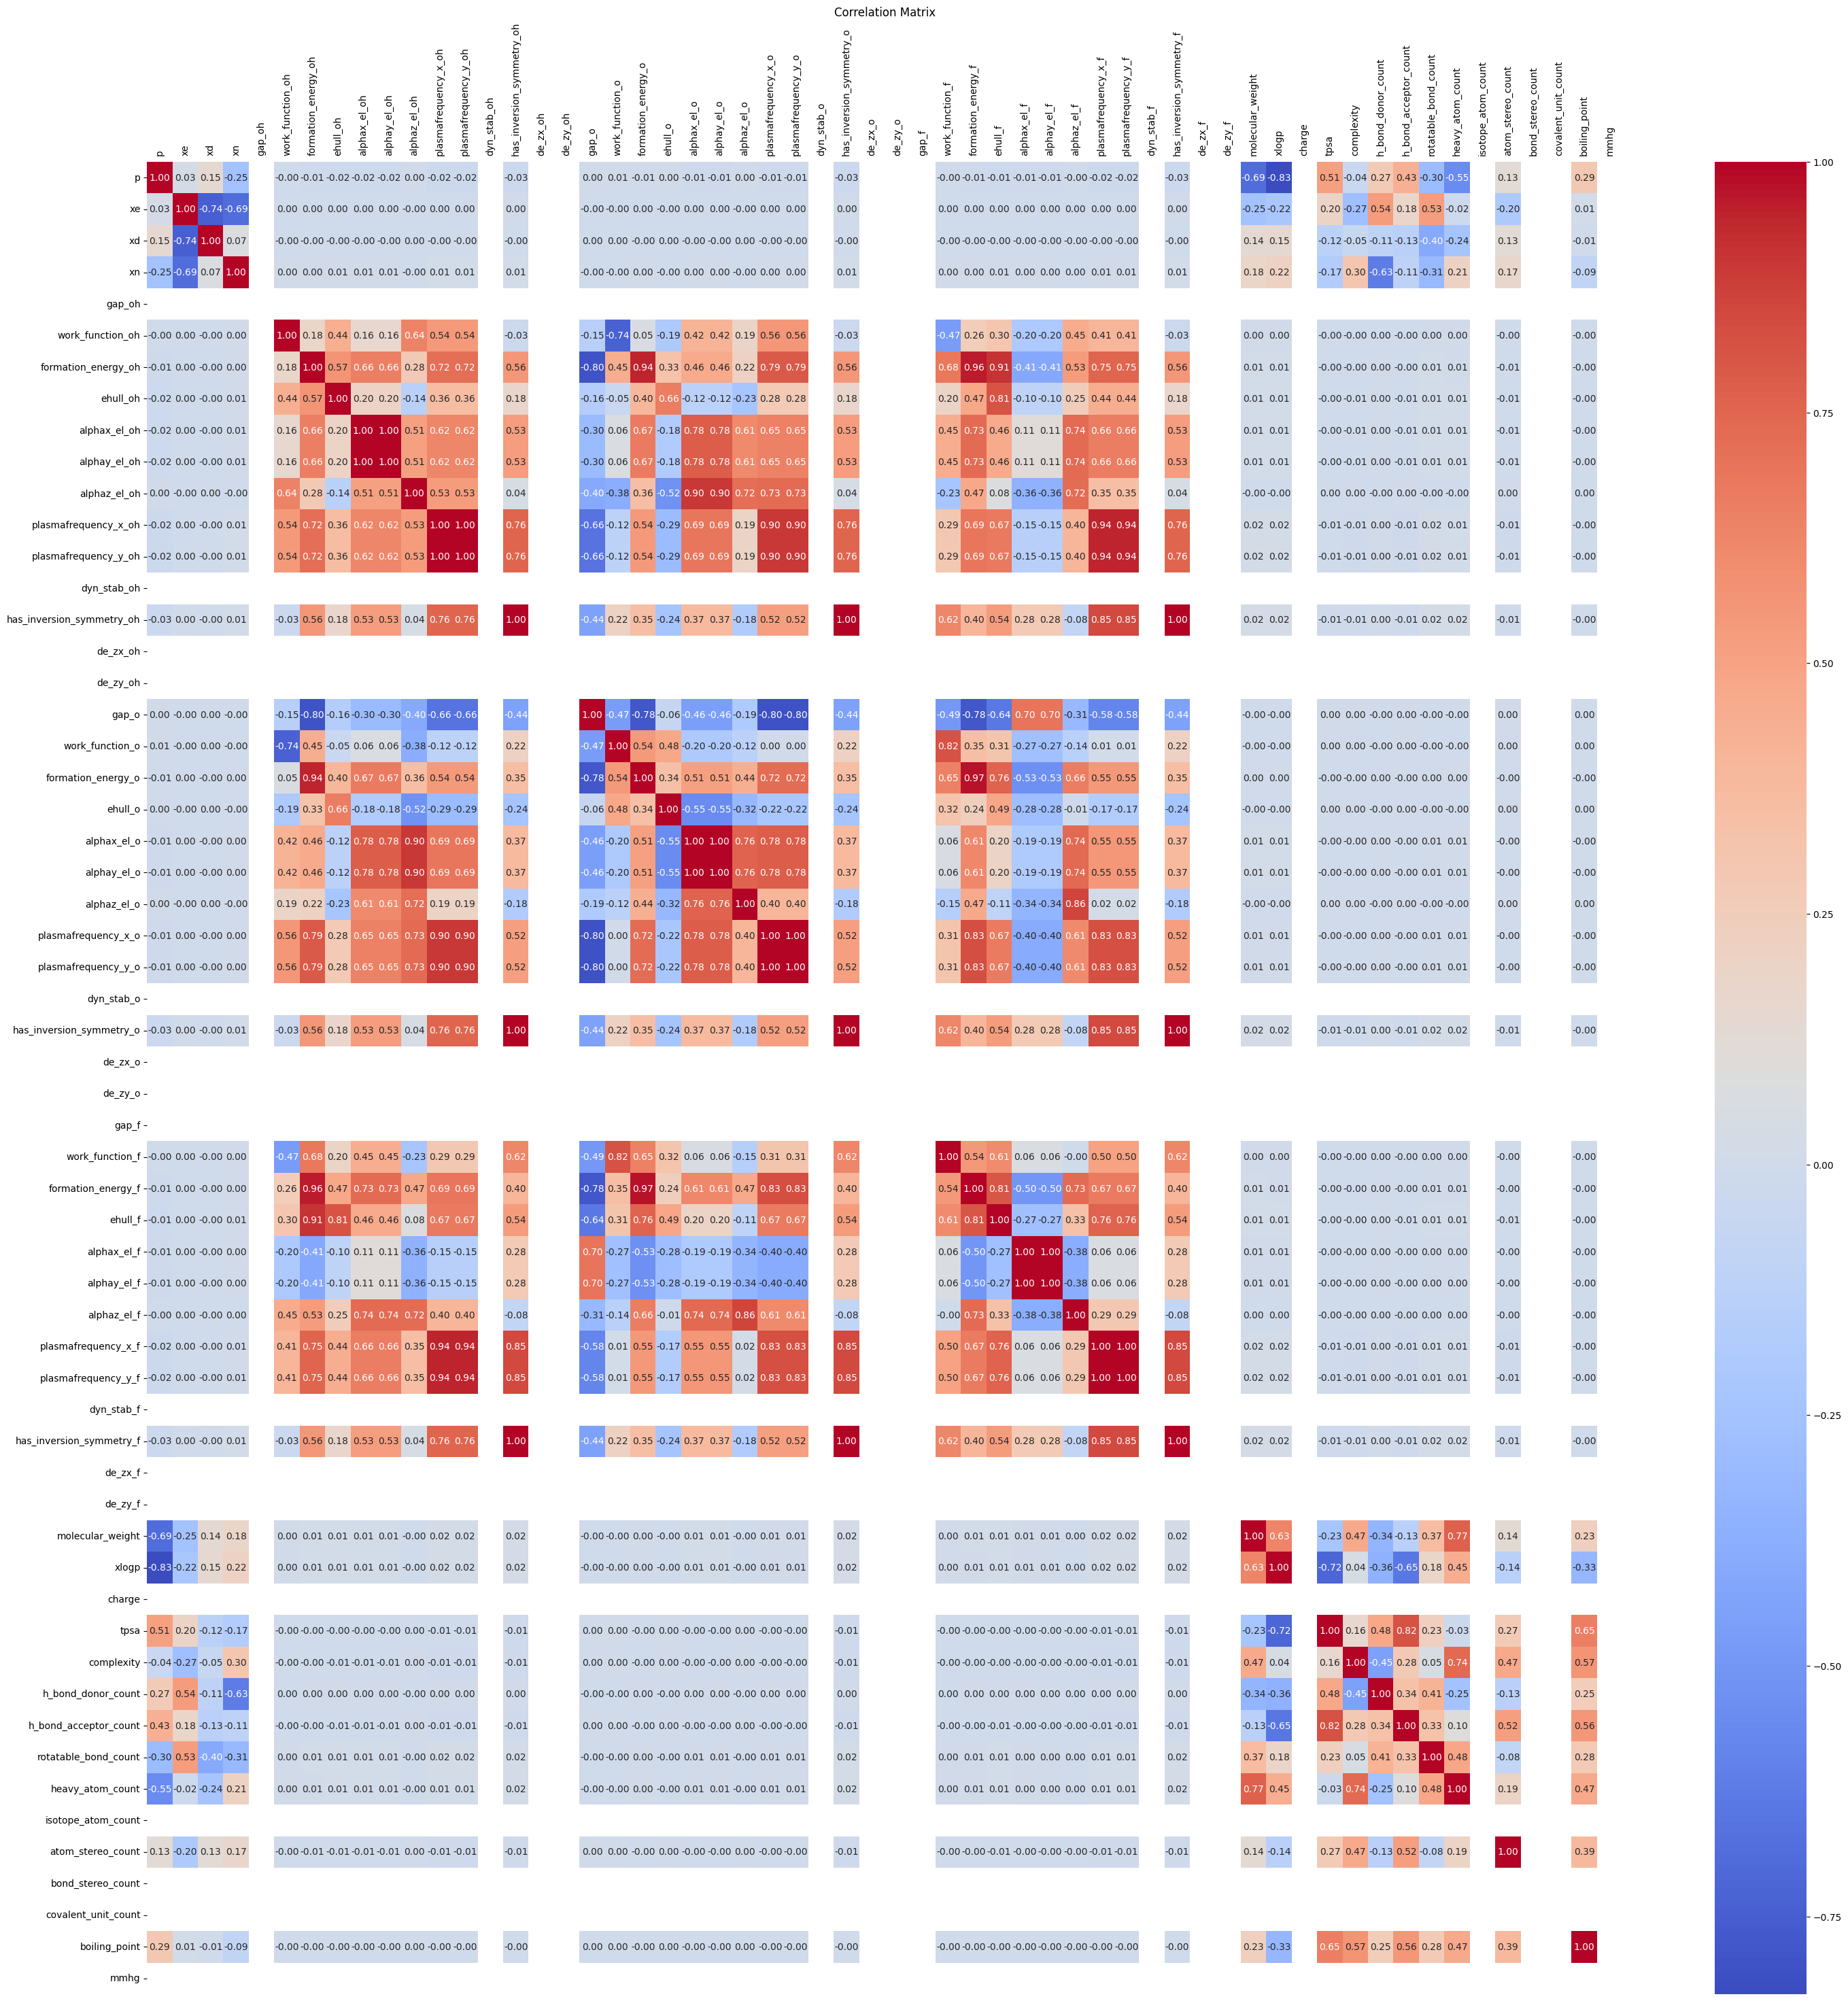

In [8]:
correlation_matrix = df.iloc[:, 6::].corr()
plt.figure(figsize=(35,35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.show()

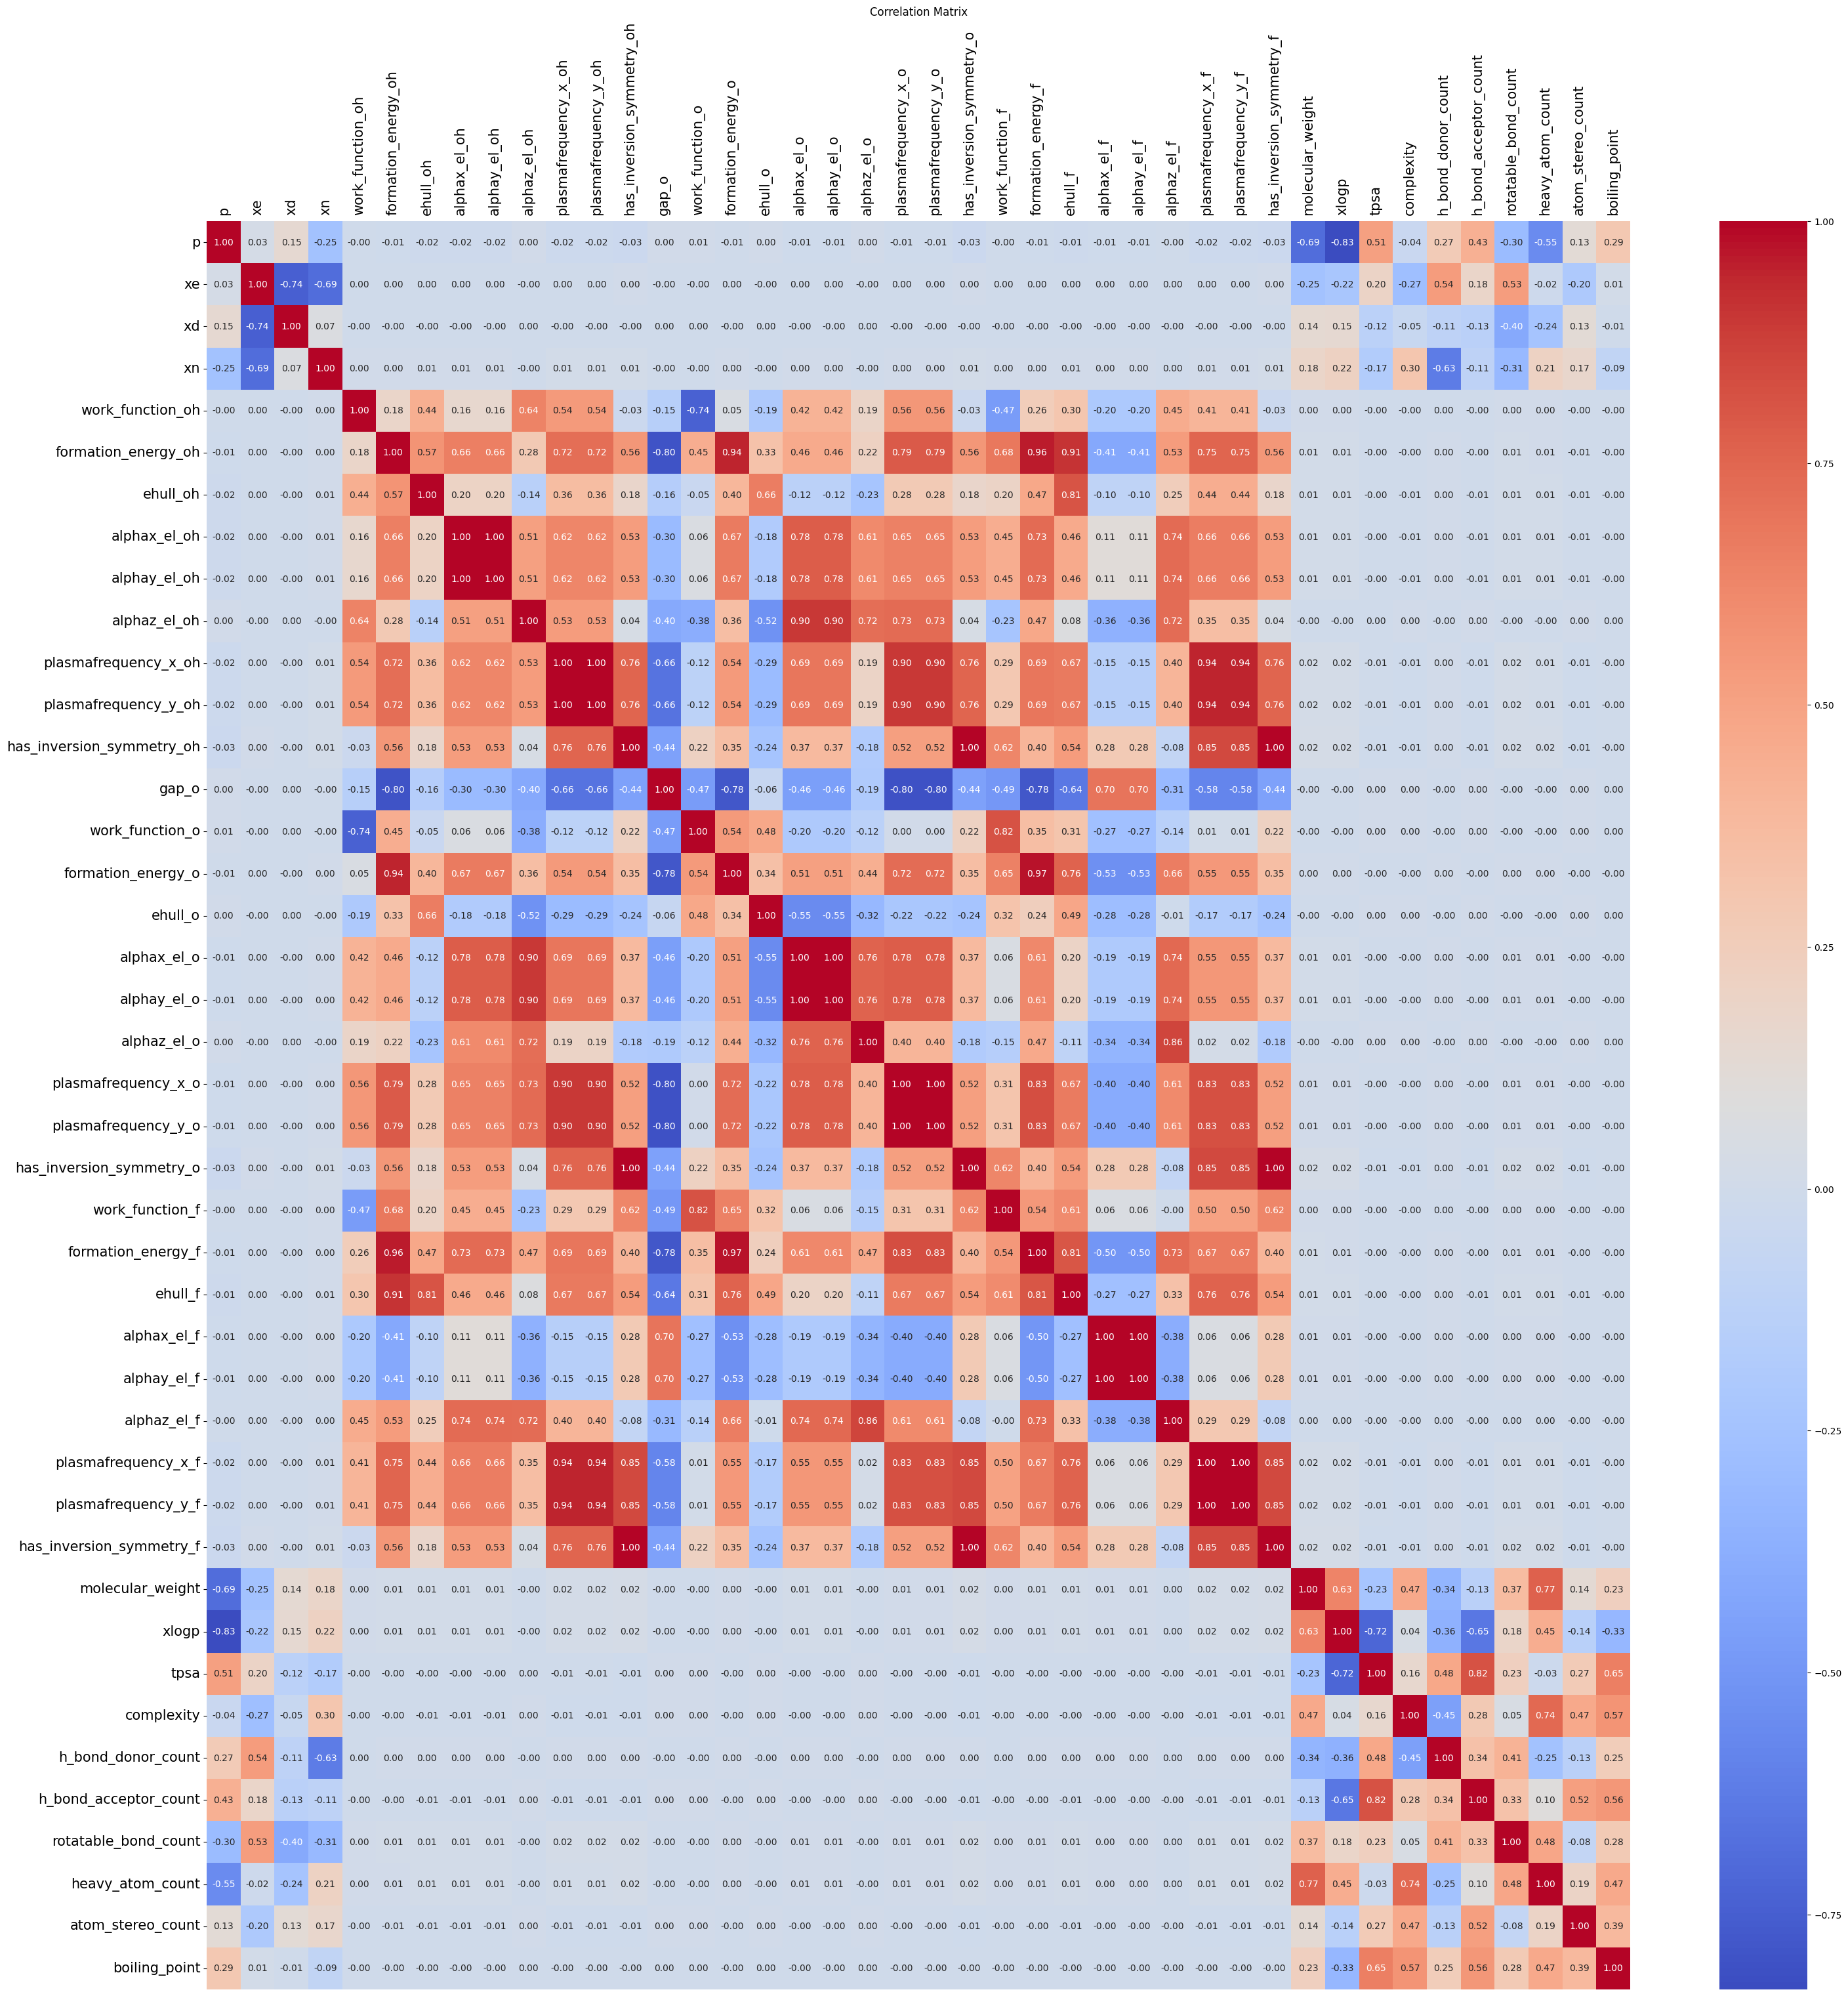

In [9]:
correlation_matrix = dfnozero.iloc[:, 6::].corr()
plt.figure(figsize=(35,35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

feature importance calculations for xgboost, random forest classifiers on only labelled data

(58, 42) (58,)
Feature  0:                              p, Score: 0.10454
Feature  1:                             xe, Score: 0.07053
Feature  2:                             xd, Score: 0.05933
Feature  3:                             xn, Score: 0.11489
Feature  4:               work_function_oh, Score: 0.00080
Feature  5:            formation_energy_oh, Score: 0.00125
Feature  6:                       ehull_oh, Score: 0.00494
Feature  7:                   alphax_el_oh, Score: 0.00237
Feature  8:                   alphay_el_oh, Score: 0.00070
Feature  9:                   alphaz_el_oh, Score: 0.00154
Feature 10:           plasmafrequency_x_oh, Score: 0.00214
Feature 11:           plasmafrequency_y_oh, Score: 0.00301
Feature 12:      has_inversion_symmetry_oh, Score: 0.00203
Feature 13:                          gap_o, Score: 0.00063
Feature 14:                work_function_o, Score: 0.00432
Feature 15:             formation_energy_o, Score: 0.00000
Feature 16:                        ehull_

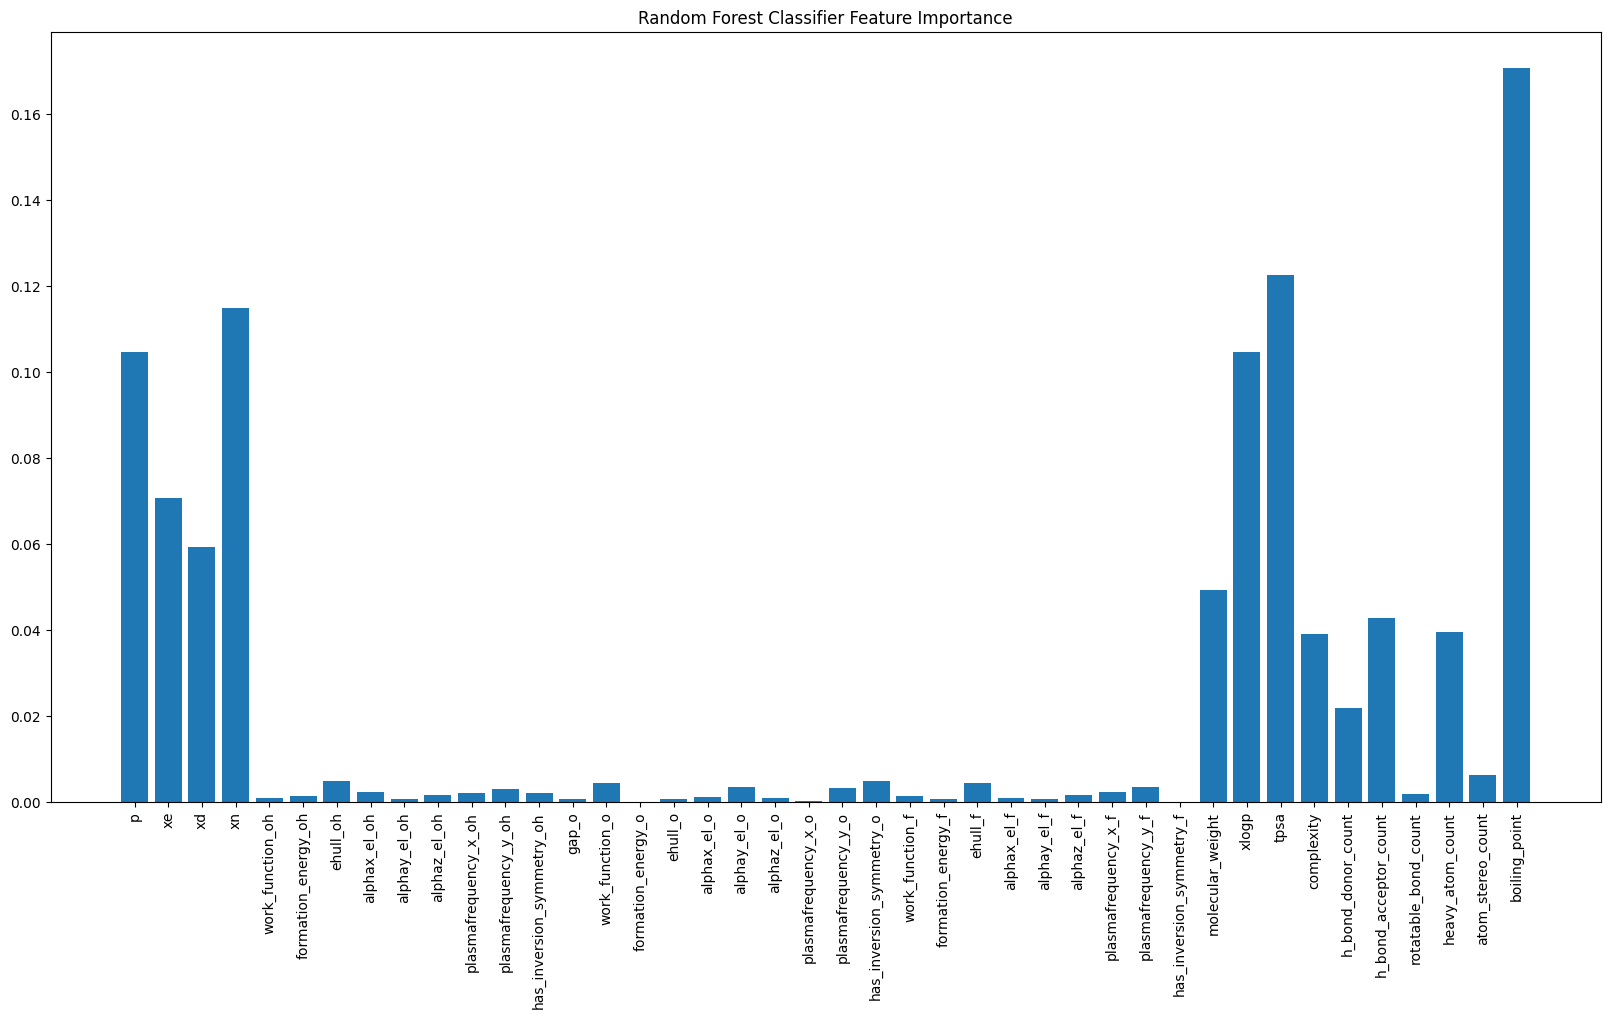

In [10]:
X = labdfnozero.iloc[:, 6::]
y = labdfnozero["label"]
print(X.shape, y.shape)
model = sk.ensemble.RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %2d: %30s, Score: %.5f' % (i,labdfnozero.columns[i+6],v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([labdfnozero.columns[x+6] for x in range(len(importance))], importance)
plt.tick_params(axis='x', labelrotation=90)
plt.title('Random Forest Classifier Feature Importance')
plt.show()

(58, 42) (58,)
Feature  0:                              p, Score: 0.02334
Feature  1:                             xe, Score: 0.01053
Feature  2:                             xd, Score: 0.00000
Feature  3:                             xn, Score: 0.48274
Feature  4:               work_function_oh, Score: 0.00000
Feature  5:            formation_energy_oh, Score: 0.00000
Feature  6:                       ehull_oh, Score: 0.00000
Feature  7:                   alphax_el_oh, Score: 0.00000
Feature  8:                   alphay_el_oh, Score: 0.00000
Feature  9:                   alphaz_el_oh, Score: 0.00000
Feature 10:           plasmafrequency_x_oh, Score: 0.00000
Feature 11:           plasmafrequency_y_oh, Score: 0.00000
Feature 12:      has_inversion_symmetry_oh, Score: 0.00000
Feature 13:                          gap_o, Score: 0.00000
Feature 14:                work_function_o, Score: 0.00000
Feature 15:             formation_energy_o, Score: 0.00000
Feature 16:                        ehull_

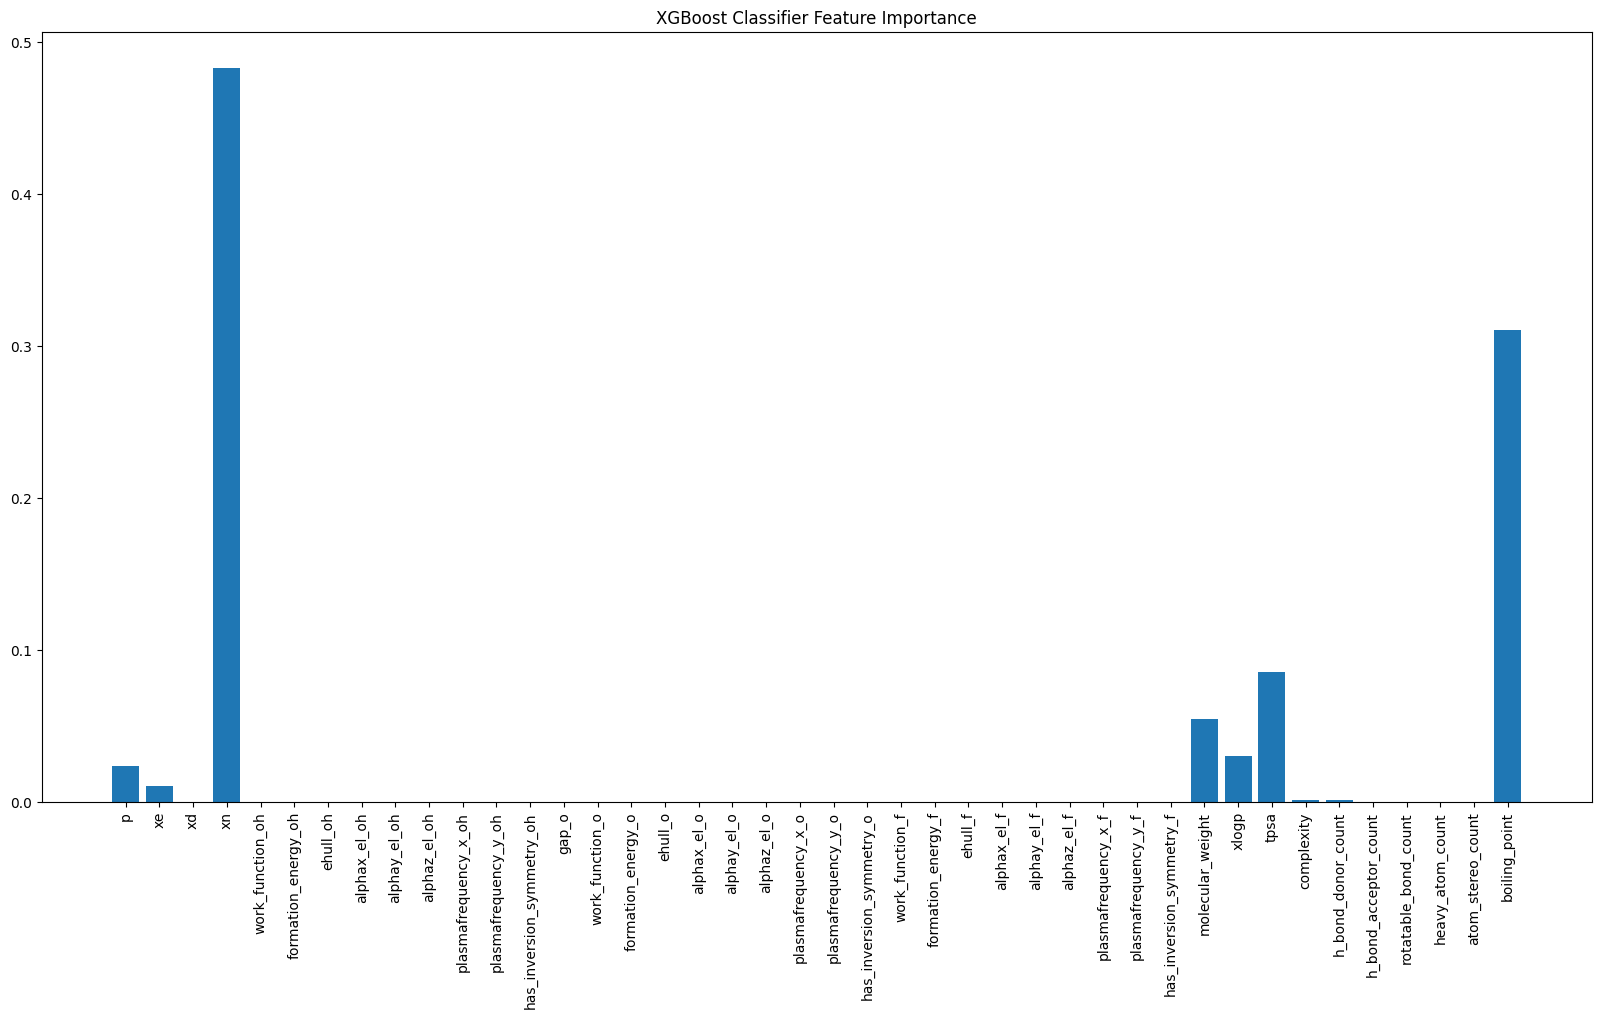

In [11]:
X = labdfnozero.iloc[:, 6::]
y = np.array([0 if x == -1 else x for x in labdfnozero["label"]])
print(X.shape, y.shape)
model = xgboost.XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature %2d: %30s, Score: %.5f' % (i,labdfnozero.columns[i+6],v))
# plot feature importance
plt.figure(figsize=(20,10))
plt.bar([labdfnozero.columns[x+6] for x in range(len(importance))], importance)
plt.tick_params(axis='x', labelrotation=90)
plt.title('XGBoost Classifier Feature Importance')
plt.show()

focus on high importance features for correlation matrices

In [12]:
rfHighImportance = pd.concat([labdfnozero.iloc[:, 6:10], labdfnozero.iloc[:, 38:44], labdfnozero.iloc[:, -2]], axis=1)
xgHighImportance = pd.concat([labdfnozero.iloc[:, 6:10], labdfnozero.iloc[:, 38:42], labdfnozero.iloc[:, 43], labdfnozero.iloc[:, -2]], axis=1)

print(rfHighImportance.head())
print(xgHighImportance.head())

     p    xe    xd    xn  molecular_weight  xlogp  tpsa  complexity  \
0  9.0  0.40  0.34  0.26            18.015   -0.5   1.0         0.0   
1  5.2  0.51  0.21  0.28            46.070   -0.1  20.2         2.8   
2  6.6  0.51  0.19  0.30            32.042   -0.5  20.2         2.0   
3  5.4  0.36  0.24  0.40            58.080   -0.1  17.1        26.3   
4  6.2  0.33  0.26  0.41            41.050    0.0  23.8        29.3   

   h_bond_donor_count  h_bond_acceptor_count  atom_stereo_count  
0                   1                      1                  0  
1                   1                      1                  0  
2                   1                      1                  0  
3                   0                      1                  0  
4                   0                      1                  0  
     p    xe    xd    xn  molecular_weight  xlogp  tpsa  complexity  \
0  9.0  0.40  0.34  0.26            18.015   -0.5   1.0         0.0   
1  5.2  0.51  0.21  0.28           

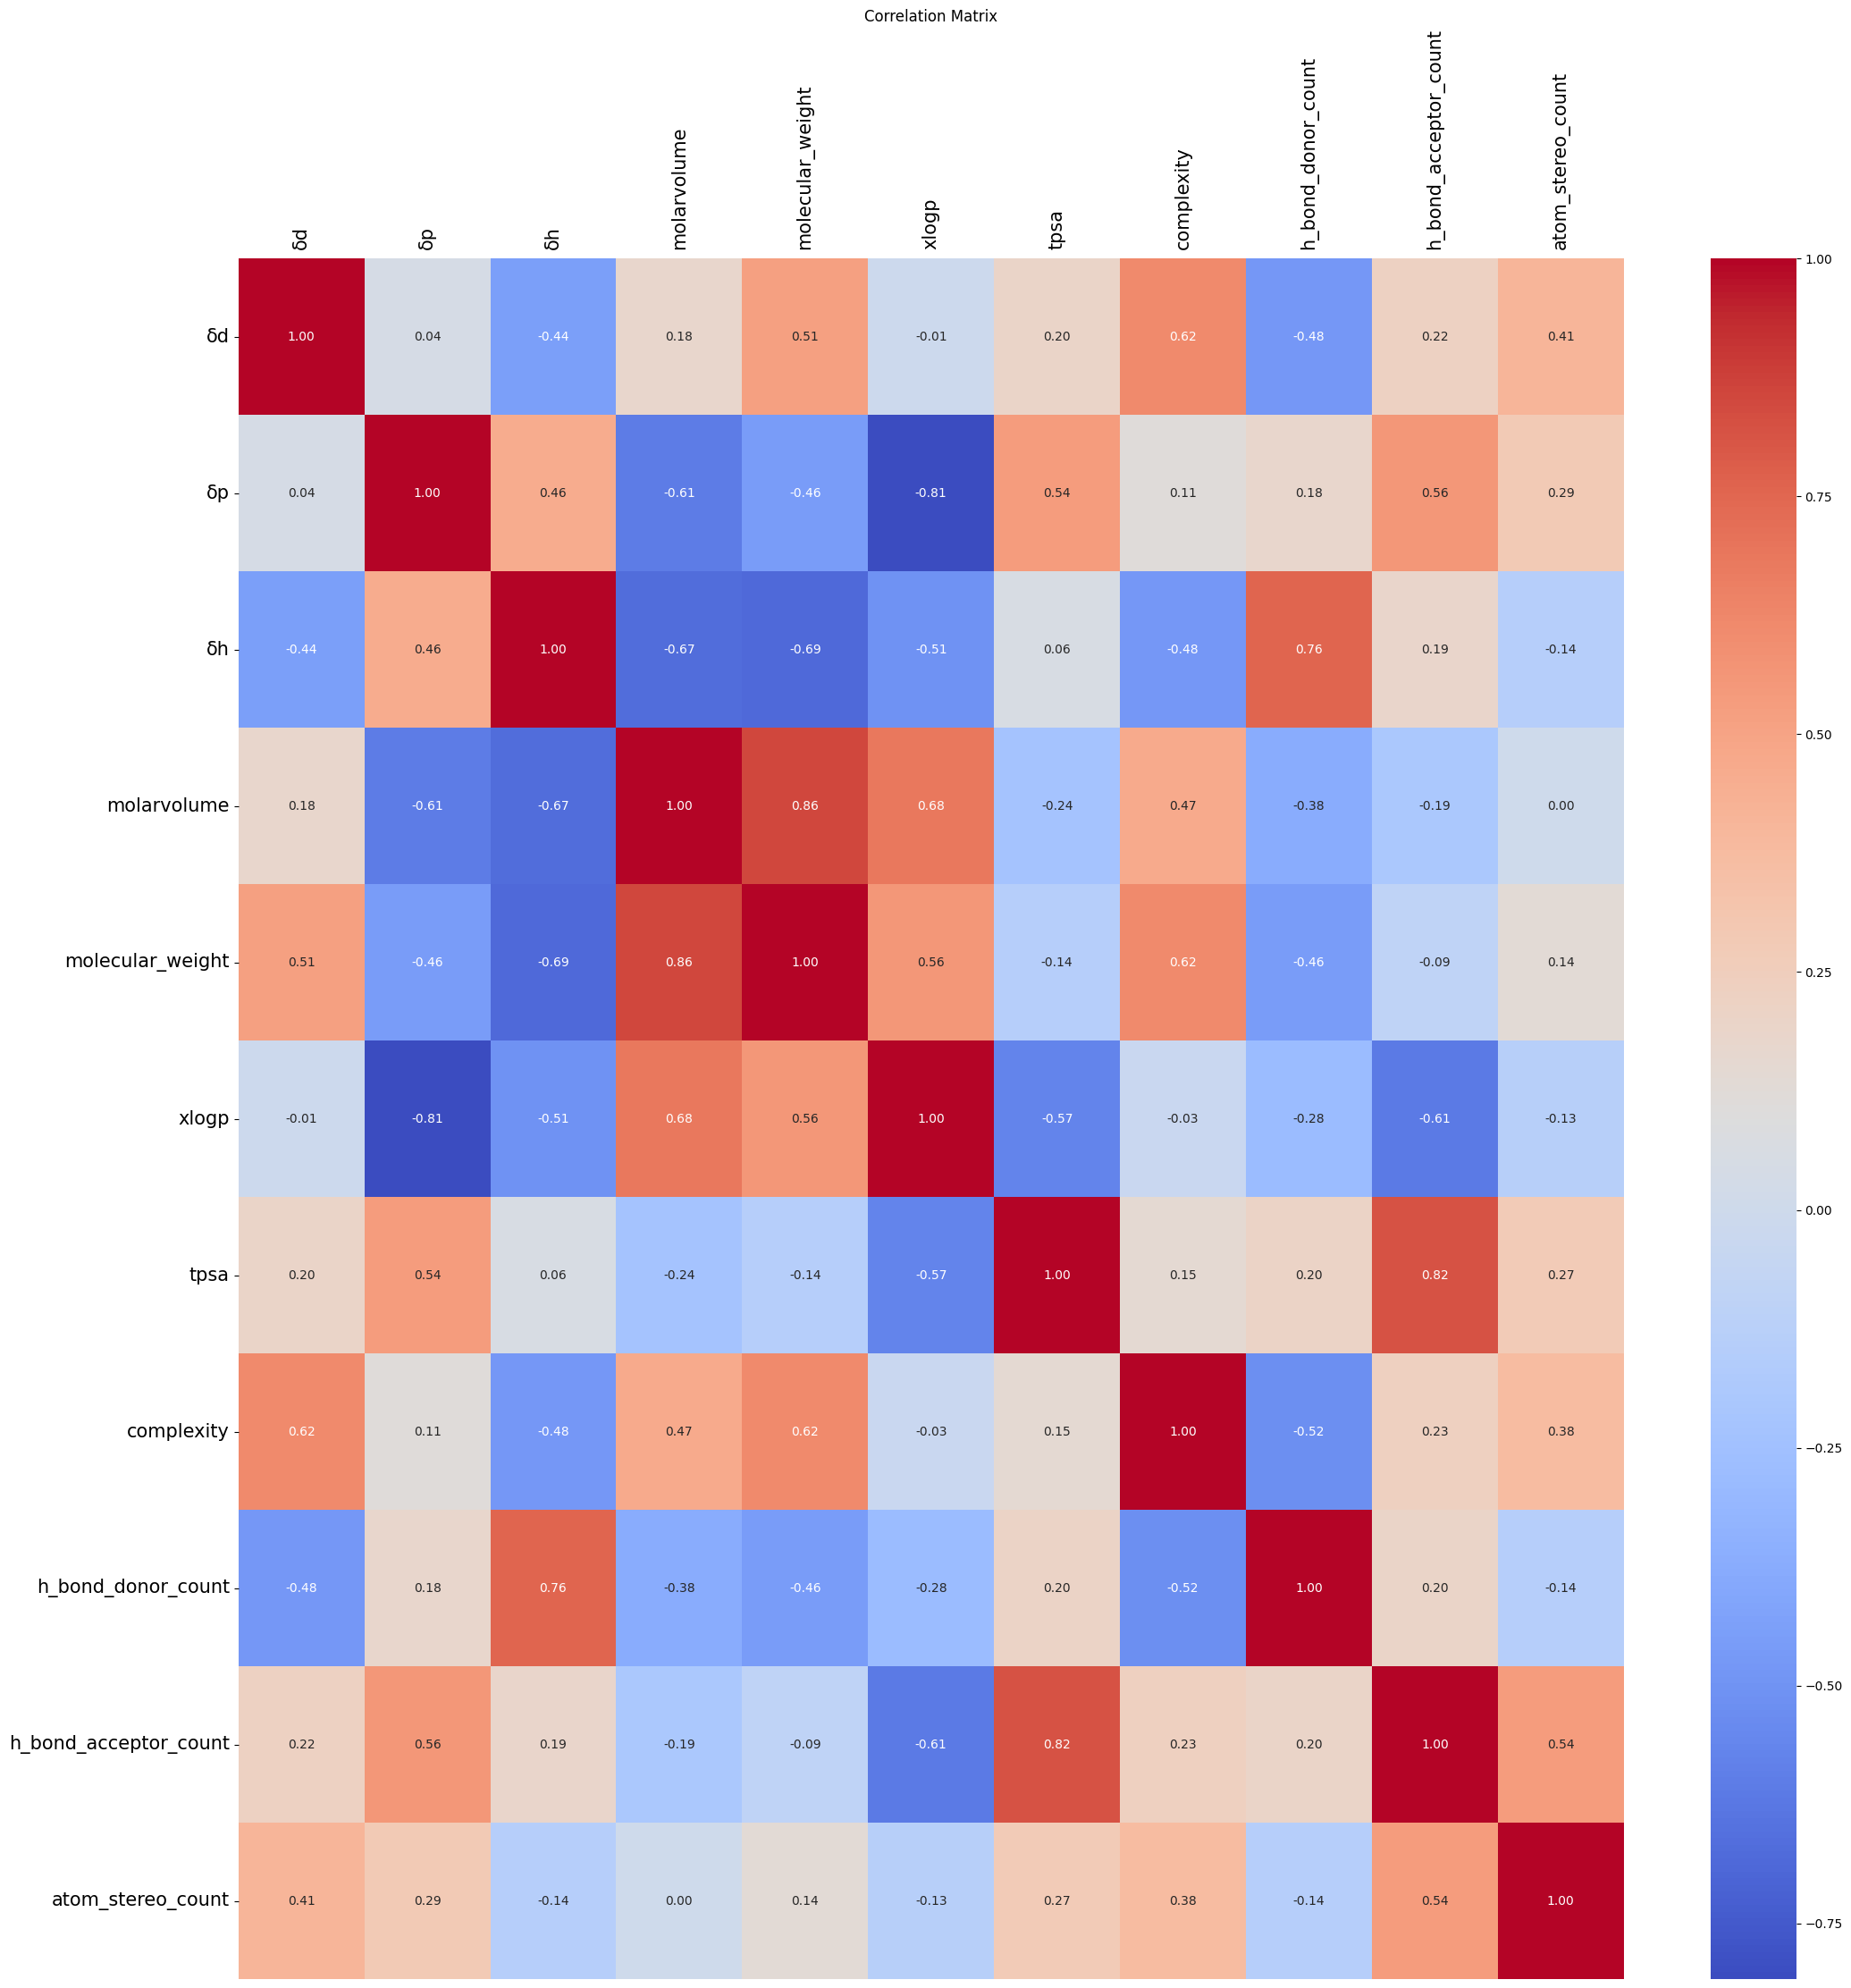

In [167]:
correlation_matrix = rfHighImportance.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.tick_params(axis='y', which='major', labelsize=15, labelrotation=0)
plt.show()

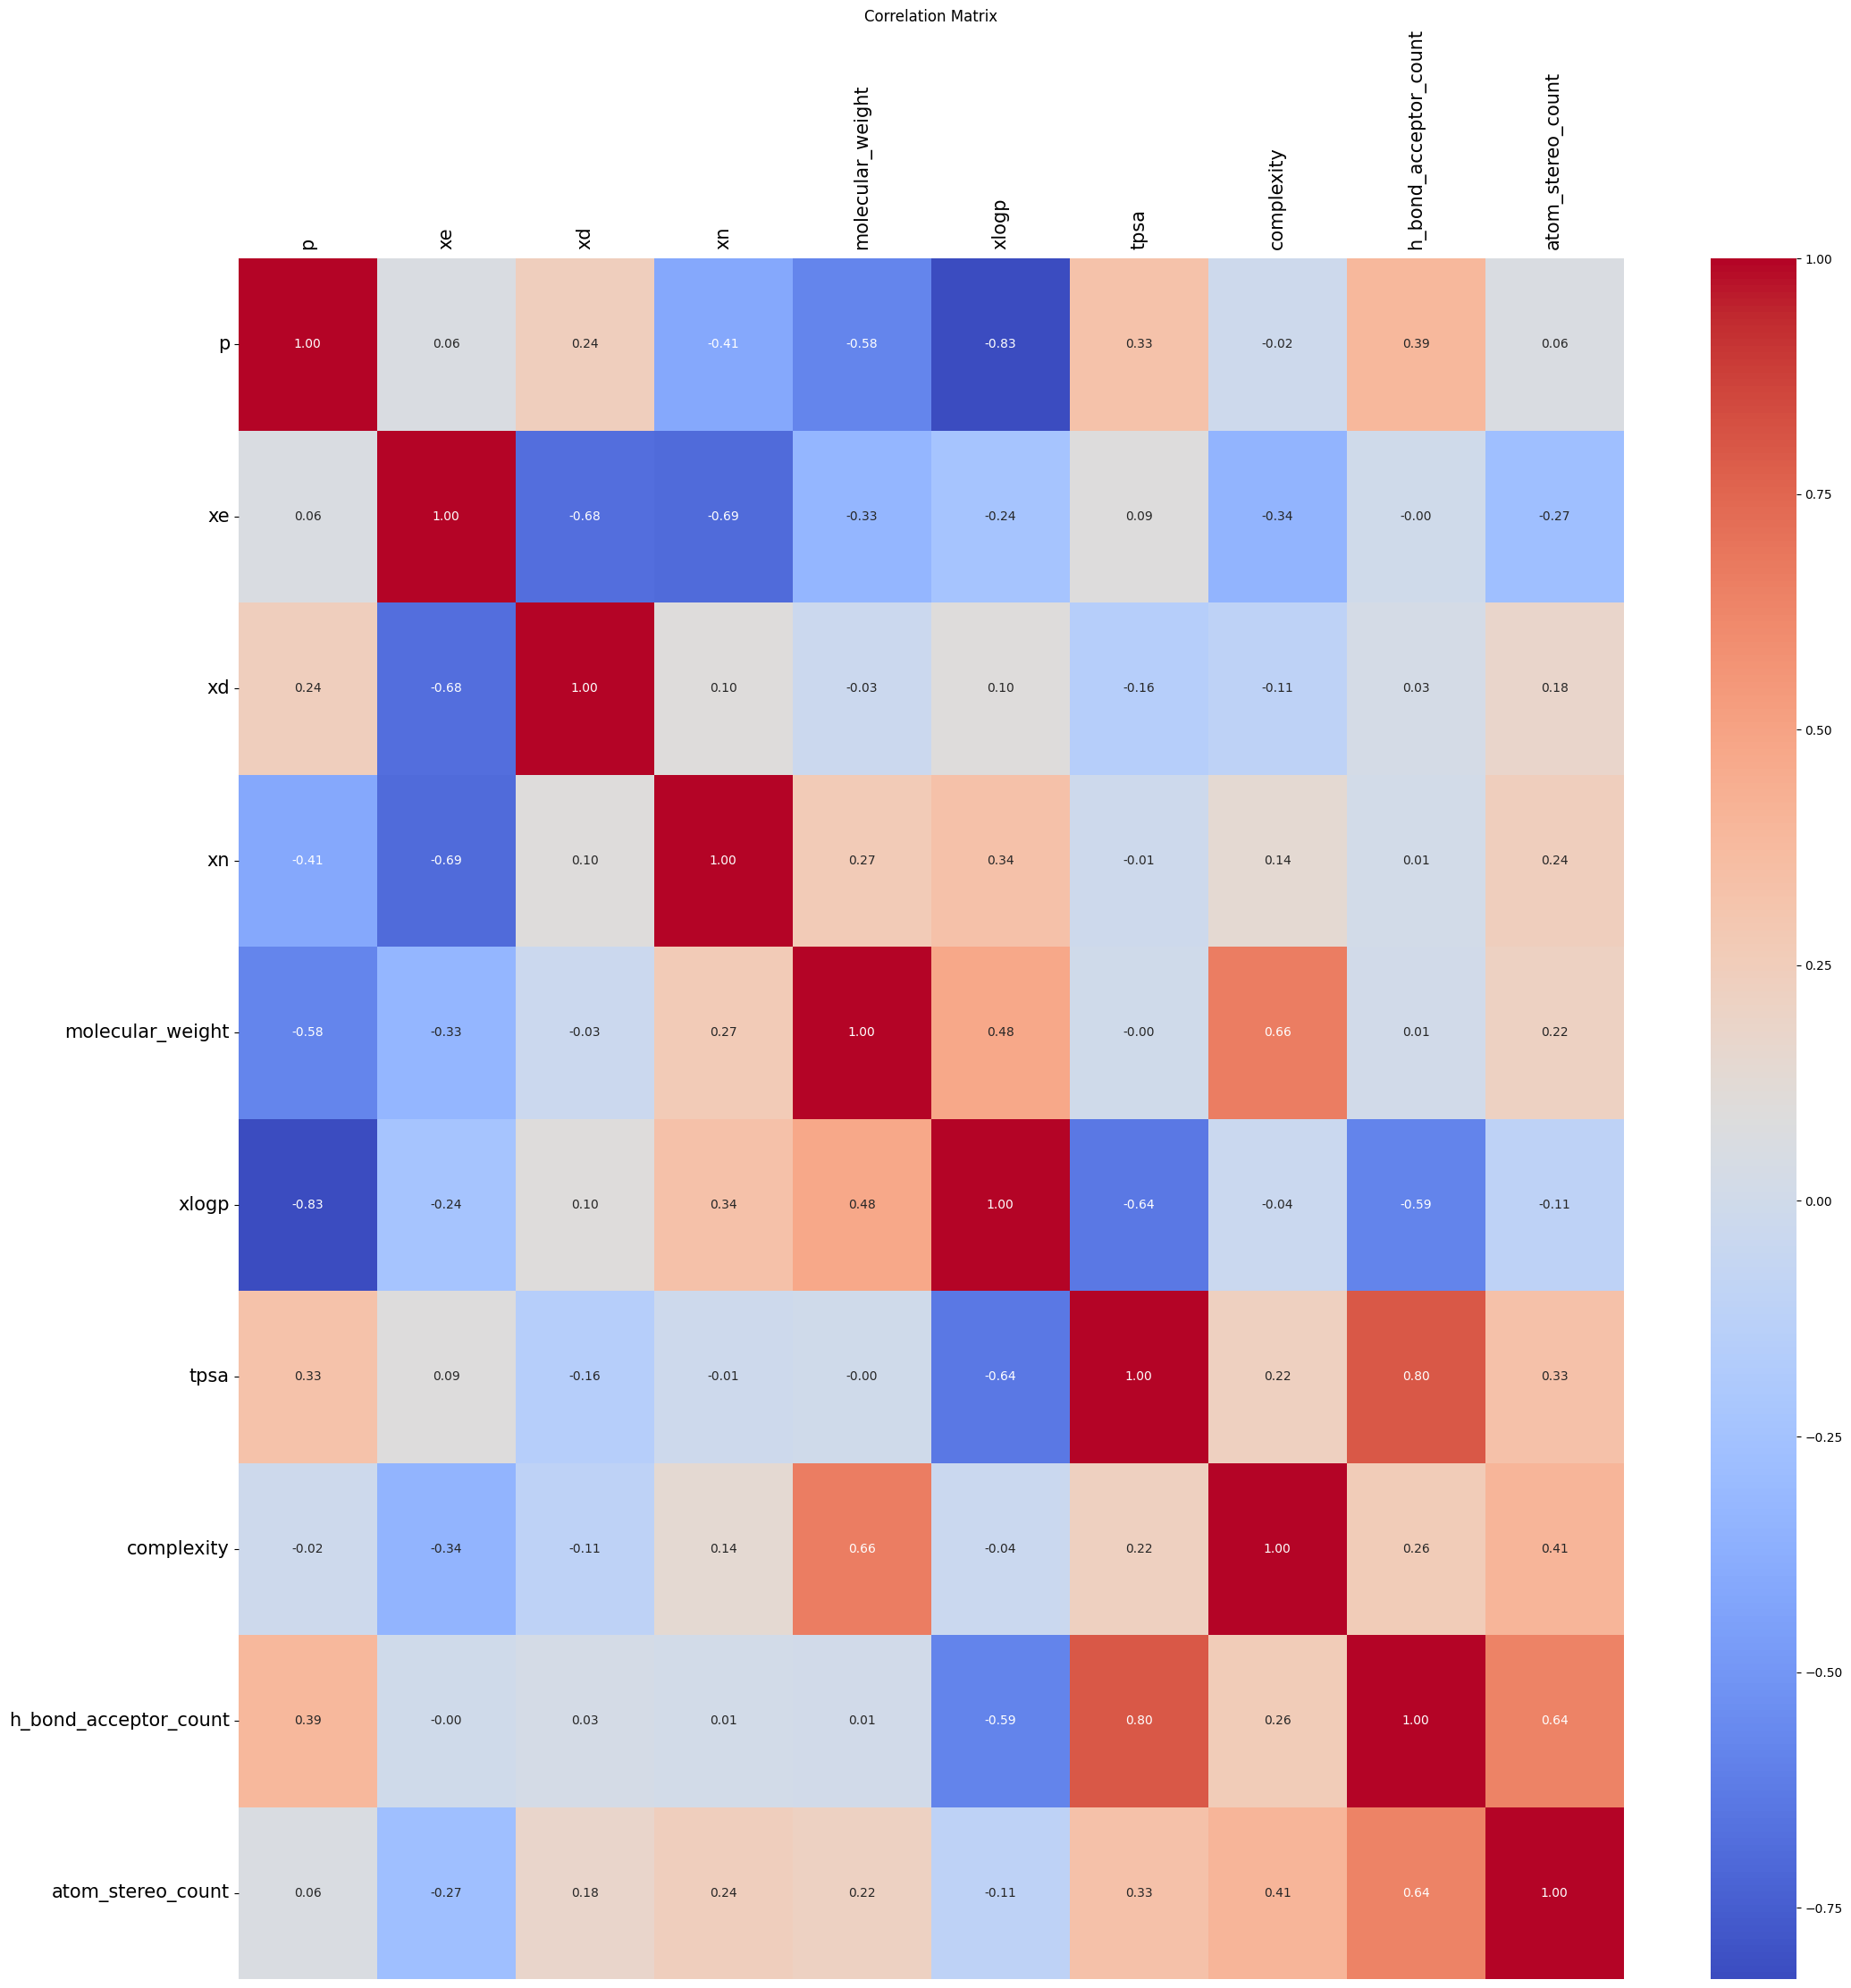

In [13]:
correlation_matrix = xgHighImportance.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90)
plt.tick_params(axis='y', which='major', labelsize=15, labelrotation=0)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 74 non-null     int64  
 1   mx                         74 non-null     object 
 2   method                     74 non-null     object 
 3   solvent                    74 non-null     object 
 4   label                      74 non-null     int64  
 5   inchikey                   74 non-null     object 
 6   δd                         74 non-null     float64
 7   δp                         74 non-null     float64
 8   δh                         74 non-null     float64
 9   molarvolume                74 non-null     float64
 10  work_function_oh           74 non-null     float64
 11  formation_energy_oh        74 non-null     float64
 12  ehull_oh                   74 non-null     float64
 13  alphax_el_oh               74 non-null     float64
 14  a